In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

***Read Images by cv2***

In [48]:
import os
os.path.abspath('.')

'/home/hukim/prj/image_processing'

In [4]:
## read
## cv2 read BGR color, but most other libraries read RGB, so convert
im = cv2.imread("data/beach.jpg")[:,:,::-1]
print im.shape
print im.dtype
print im.min(), im.max()

(233, 350, 3)
uint8
0 255


***Show Images by plt***

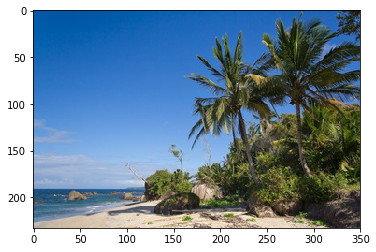

In [5]:
## display
plt.imshow(im)

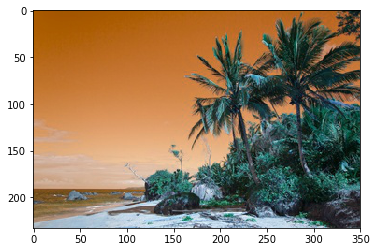

In [6]:
## otherwise ...
plt.imshow(im[:,:,::-1])

***Pixel Manipulation by numpy***

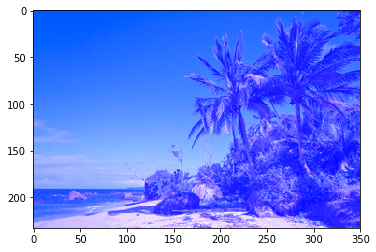

In [7]:
## manipulate pixles - cv2 store them as bgr instead of rgb
imm = im.copy()
imm[:, :, 2] = 255
plt.imshow(imm)

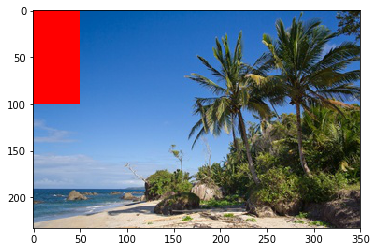

In [8]:
## manipulate pixles 
imm = im.copy()
imm[:100, :50] = (255, 0, 0) # red corner
plt.imshow(imm)

***modify image by drawing via cv2***

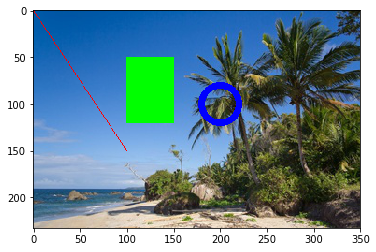

In [9]:
imm = im.copy()
## params: img, (x1, y1), (x2, y2), color (of the current img channel repr.)
cv2.line(imm, (0, 0), (100, 150), (255, 0, 0), ) #red line
cv2.circle(imm, (200, 100), 20, color = (0, 0, 255), thickness=5) #blue circle
## filled rectangle
cv2.rectangle(imm, (100, 50), (150, 120), color = (0, 255, 0), thickness = -1)
plt.imshow(imm)




# ***Traditional Image Processing by cv2***
- transform (translation, rotation, resizing, flipping and cropping)
- pixel arithmetics
- color channel decomposition
- most of them are using warpAffine, because some transformations need to *warp* the original image

# Image Cropping

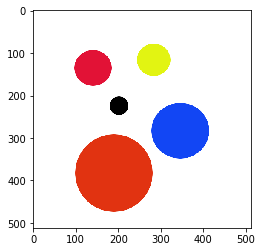

In [31]:
circles = plt.imread("data/circles.jpg")
plt.imshow(circles)
plt.show()

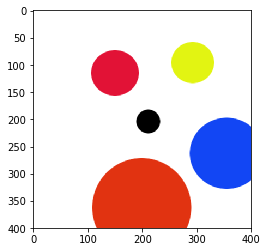

In [32]:
patchsize = 400
patch = (int(patchsize), int(patchsize))
center = (190, 220)
cropped_image = cv2.getRectSubPix(circles, patch, center)
plt.imshow(cropped_image)
plt.show()

# **translation - cv.warpAffine**
- params: img, transMatrix, dsize (dest image size)
- transMatrix M should always be np.asarray([[1., 0., tx], [0., 1., ty]]), where tx and ty are offset on x and y (-x -> left, -y -> up). And it must be a float matrix
- dsize should most of time be (src_img.shape[1], src_img.shape[0]), which are WIDTH and HEIGHT of images (in image domain instead of ndarray domain)

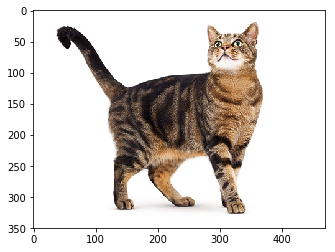

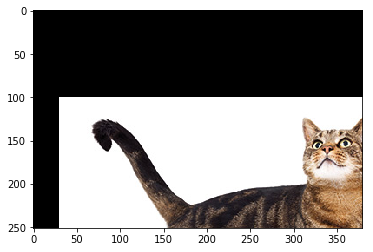

In [17]:
cat = cv2.imread("data/cat.jpg")[:, :, ::-1]
shifted_cat = cv2.warpAffine(cat, 
               np.array([[1, 0, 30], 
                        [0, 1, 100]], 
                dtype = np.float),
               dsize = (trex.shape[1], trex.shape[0])) # right down shift
plt.imshow(cat)
plt.figure()
plt.imshow(shifted_cat)

# **rotation-cv2.warpAffine**
- get the transform matrix with `cv2.getRotationMatrix2D`
- params to `cv2.getRotationMatrix2D`: center, angle(+ -> counterclockwise), scale

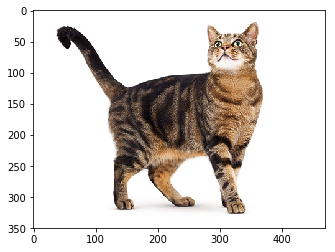

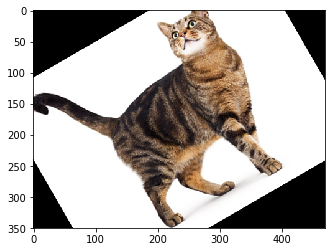

In [22]:
cat = cv2.imread("data/cat.jpg")[:, :, ::-1]
center = cat.shape[1]/2, cat.shape[0]/2
angle = 30

M = cv2.getRotationMatrix2D(center, angle, 1.0)

rotated_cat = cv2.warpAffine(cat, M, (cat.shape[1], cat.shape[0]))
plt.imshow(cat)
plt.figure()
plt.imshow(rotated_cat)

# **resizing - cv2.resize**
- it is aspect-ratio (width/height) constant resize 
- params to cv2.resize: img, (with, height) of dest, interpolation_method, cv2.INTER_XX, e.g., cv2.INTER_AREA
- you can also do it via rotation and warpAffine, but the effects are very different - in terms of the dimension of the resulted arrays

(350, 470, 3)


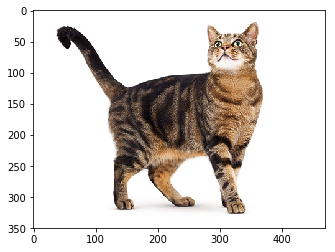

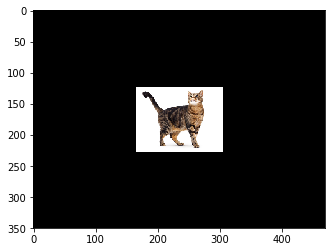

In [26]:
cat = cv2.imread("data/cat.jpg")[:, :, ::-1]
center = cat.shape[1]/2, cat.shape[0]/2
M = cv2.getRotationMatrix2D(center, 0, 0.3)
resized_cat = cv2.warpAffine(cat, M, (cat.shape[1], cat.shape[0]))
plt.imshow(cat)
plt.figure()
plt.imshow(resized_cat)
print resized_cat.shape

(105, 141, 3)


False

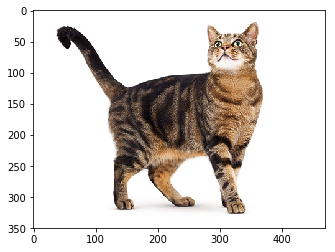

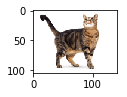

In [27]:
cat = cv2.imread("data/cat.jpg")[:, :, ::-1]
width, height = int(cat.shape[1]*0.3), int(cat.shape[0]*0.3)
resized_cat = cv2.resize(cat, 
                          (width, height), 
                          interpolation = cv2.INTER_AREA,)
plt.imshow(cat)
plt.figure(figsize = (1.5, 1.5))
plt.imshow(resized_cat)
print resized_cat.shape

cv2.imwrite("data/images/small_cat.jpg", resized_cat)

# **flipping**

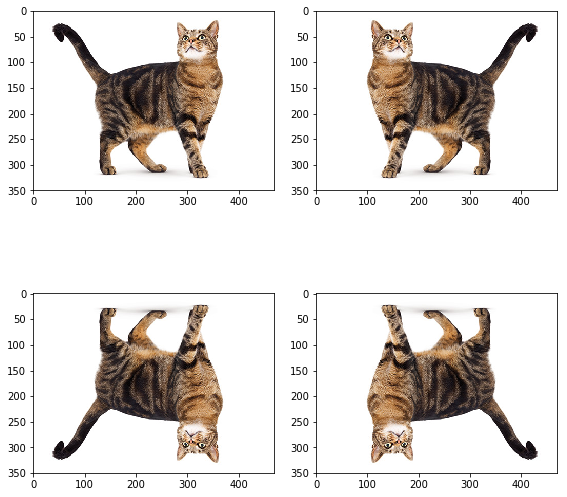

In [29]:
cat = cv2.imread("data/cat.jpg")[:, :, ::-1]
fig, axes = plt.subplots(2, 2, figsize = (8, 8))

fig.tight_layout()

axes = axes.ravel()
axes[0].imshow(cat)
axes[1].imshow(cat[:, ::-1, :])
axes[2].imshow(cat[::-1, :, :])
axes[3].imshow(cat[::-1, ::-1, :])

# padding

In [41]:
img = cv2.imread('data/beach.jpg')[:,:,::-1]
bordersize = 100
color = [255, 255, 255]
bordered_img=cv2.copyMakeBorder(img, 
                                top=bordersize,bottom=bordersize, 
                                left=bordersize, right=bordersize, 
                                borderType= cv2.BORDER_CONSTANT, 
                                value=color )

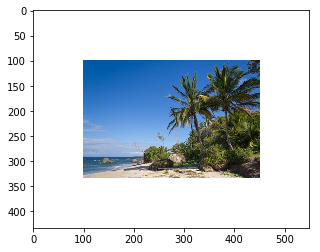

In [42]:
#cv2.circle(bordered_img, (300, 320), radius = 10, color = [255, 0 ,0])
plt.imshow(bordered_img)
plt.show()

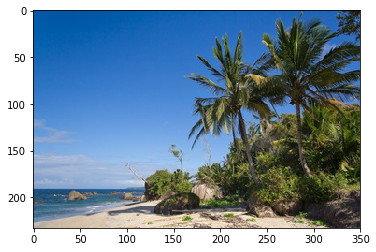

In [43]:
## RGB images - BGR to RGB
beach = cv2.imread("data/beach.jpg")[:,:,::-1]
plt.imshow(beach)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9fb04ac5d0>,
 Text(0.5,1,u'CONSTANT'))

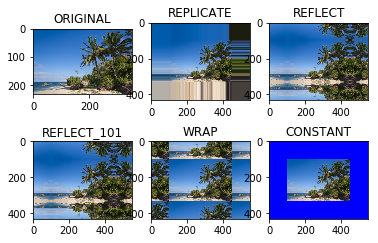

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = (0,0,255)

img1 = beach ## no need to explicitly copy

replicate = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

***Split Color Channels***
- using cv2.split and cv2.merge needs to stick with (BGR) channel encoding, which might be more troublesome

Text(0.5,1,u'blue')

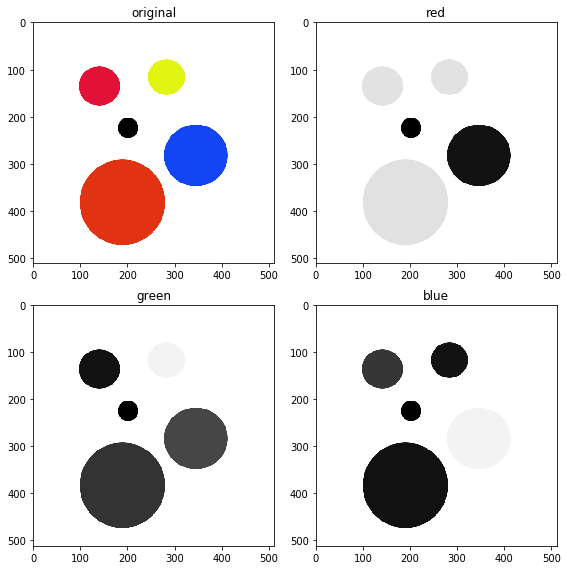

In [17]:
wave = cv2.imread("data/circles.jpg")[:,:,::-1]
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
axes = axes.ravel()

fig.tight_layout()
axes[0].imshow(wave)
axes[0].set_title("original")
axes[1].imshow(wave[:, :, 0], cmap = plt.cm.gray)
axes[1].set_title("red")
axes[2].imshow(wave[:, :, 1], cmap = plt.cm.gray)
axes[2].set_title("green")
axes[3].imshow(wave[:, :, 2], cmap = plt.cm.gray)
axes[3].set_title("blue")